# Imbalaced Classification

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

from sklearn.datasets import make_moons
from imblearn.datasets import make_imbalance


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X, y = make_moons(n_samples=200, shuffle=True, noise=0.5, random_state=42)
X, y = make_imbalance(X, y, sampling_strategy={0: 100, 1: 20}, random_state=42)
print(Counter(y))

Counter({0: 100, 1: 20})


In [3]:
data = pd.concat([ pd.DataFrame(X), pd.DataFrame(y)], axis=1)
data.columns = ['A', 'B', 'Class']

/home/yura/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/yura/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


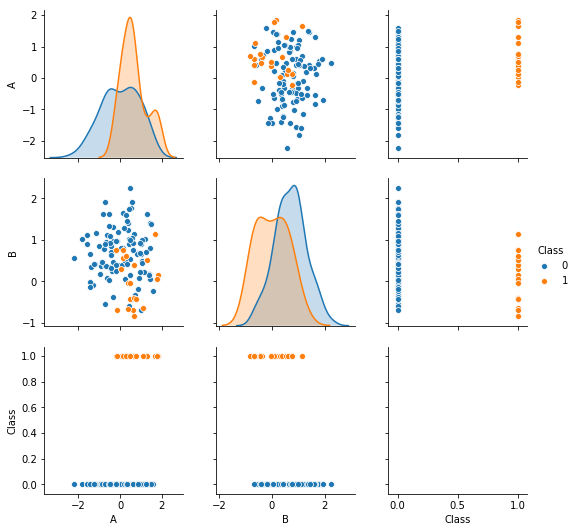

In [4]:
sns.pairplot(data, hue='Class')

## How to predict imbalanced data
1. Preprocessing: resampling
2. Cost-sensitive learning
3. Ensemble methods

### Sampling methods
1. Under-sampling
2. Over-sampling
3. Hybrid methods
4. Ensemble methods

In [5]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [6]:
X = np.array(X)
y = np.array(y).flatten()
print(Counter(y))

Counter({0: 100, 1: 20})


In [7]:
# Random Under Sampling
X_rus, y_rus = RandomUnderSampler(sampling_strategy={0: 20, 1: 20}, random_state=42).fit_resample(X, y)
print(Counter(y_rus))

Counter({0: 20, 1: 20})


In [8]:
rus = pd.concat([pd.DataFrame(X_rus), pd.DataFrame(y_rus)], axis=1)
rus.columns = ['A', 'B', 'Class']
del X_rus, y_rus

/home/yura/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/yura/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


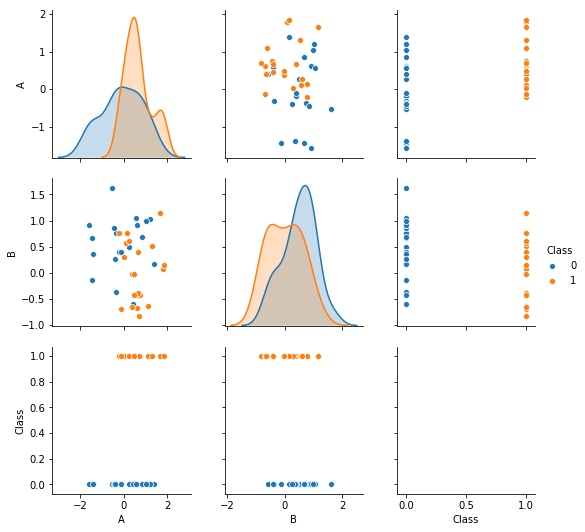

In [9]:
sns.pairplot(rus, hue='Class')

In [11]:
# Under-sampling: SMOTE
X_smt, y_smt = SMOTE(k_neighbors=5, sampling_strategy={0: 100, 1: 100}, random_state=42).fit_resample(X, y)
print(Counter(y_smt))

Counter({0: 100, 1: 100})


In [12]:
smt = pd.concat([pd.DataFrame(X_smt), pd.DataFrame(y_smt)], axis=1)
smt.columns = ['A', 'B', 'Class']
del X_smt, y_smt

/home/yura/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/yura/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


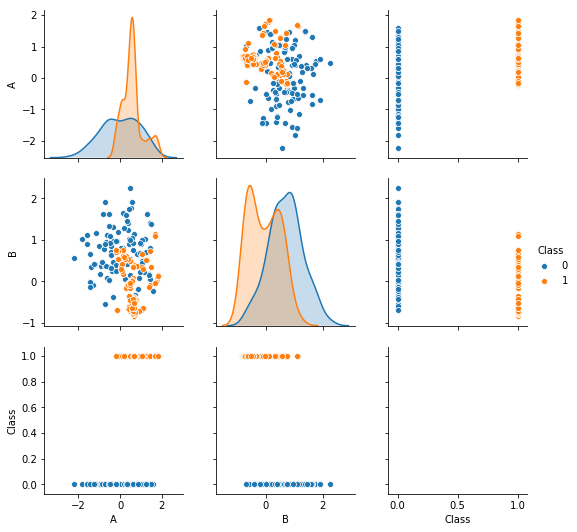

In [13]:
sns.pairplot(smt, hue='Class')

### Cost-sensitive learning

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    shuffle=True, random_state=42)

In [16]:
# normal training
clf = SVC(gamma='auto', kernel='linear', random_state=42)
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_pred = clf.predict(X_test)

In [35]:
'''
| TN | FP |
| FN | TP |
'''
print(confusion_matrix(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

[[14 12]
 [ 0  4]]
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.54      1.00      0.70      0.73      0.51        26
          1       0.25      1.00      0.54      0.40      0.73      0.56         4

avg / total       0.90      0.60      0.94      0.66      0.73      0.52        30



In [33]:
# set cost
clf = SVC(class_weight={1: '10'}, gamma='auto', kernel='linear', random_state=42)
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight={1: '10'}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

[[14 12]
 [ 0  4]]
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.54      1.00      0.70      0.73      0.51        26
          1       0.25      1.00      0.54      0.40      0.73      0.56         4

avg / total       0.90      0.60      0.94      0.66      0.73      0.52        30

